# **Facial Expression Classification Using CNN**

**Imporing Zip file of Cat and Dog images**

In [73]:
import zipfile
zip_ref = zipfile.ZipFile('/content/FacialExpressionClassification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**Importing necessary packages**

In [74]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import layers

**Dividing the training and testing set of images**

In [75]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/FacialExpressionClassification/Train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/FacialExpressionClassification/Validation',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 5673 files belonging to 7 classes.
Found 2327 files belonging to 7 classes.


In [78]:
import os

classes = os.listdir('/content/FacialExpressionClassification/Train')

In [79]:
print("Number of classes in training directory:", len(classes))
print("Classes in training directory:", classes)

Number of classes in training directory: 7
Classes in training directory: ['Surprise', 'Angry', 'Sad', 'Disgust', 'Fear', 'Happy', 'Neutral']


**Normalizing all images**

In [ ]:
# Normalizing images
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

**Creating CNN Model**

In [ ]:
# Defining the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')
])

**Summary of the model**

In [ ]:
# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

**Training model: Adam optimizer with categorical cross-entropy loss function and tracking accuracy metrics**

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
# Training the model
history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
178/178 [==============================] - 907s 5s/step - loss: 1.9421 - accuracy: 0.1980 - val_loss: 1.8735 - val_accuracy: 0.2368
Epoch 2/10
178/178 [==============================] - 915s 5s/step - loss: 1.7921 - accuracy: 0.2880 - val_loss: 1.7852 - val_accuracy: 0.2849
Epoch 3/10
178/178 [==============================] - 871s 5s/step - loss: 1.6382 - accuracy: 0.3742 - val_loss: 1.7947 - val_accuracy: 0.3077
Epoch 4/10
178/178 [==============================] - 908s 5s/step - loss: 1.3318 - accuracy: 0.5041 - val_loss: 2.0947 - val_accuracy: 0.3141
Epoch 5/10
178/178 [==============================] - 903s 5s/step - loss: 0.8873 - accuracy: 0.6783 - val_loss: 3.1787 - val_accuracy: 0.2918
Epoch 6/10
178/178 [==============================] - 854s 5s/step - loss: 0.4944 - accuracy: 0.8315 - val_loss: 3.5959 - val_accuracy: 0.3249
Epoch 7/10
178/178 [==============================] - 912s 5s/step - loss: 0.2949 - accuracy: 0.9043 - val_loss: 4.2182 - val_accuracy: 0.3348

In [ ]:
model.save('Facial_Expression_Classifier_CNN_Model.keras')

**Accuracy of the model**

In [ ]:
accuracy = history.history['accuracy']

In [ ]:
accuracy = accuracy[-1]

In [ ]:
print("Final Accuracy:", accuracy)

Final Accuracy: 0.9735589623451233


**Loading the model**

In [3]:
from tensorflow.keras.models import load_model

model = load_model('Facial_Expression_Classifier_CNN_Model.keras')

**Testing with a Neutral Image**

In [42]:
import cv2

In [11]:
import matplotlib.pyplot as plt

In [98]:
test_img = cv2.imread('/content/happy.jpg')

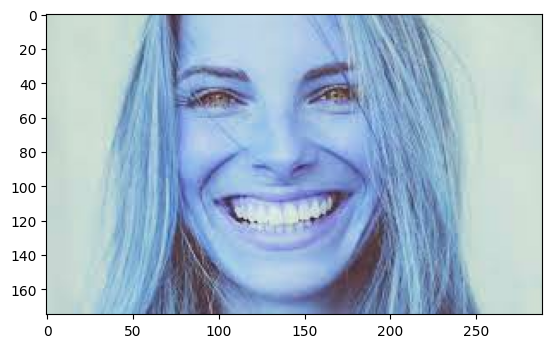

In [99]:
plt.imshow(test_img)

In [100]:
test_img.shape

(175, 289, 3)

In [101]:
test_img = cv2.resize(test_img,(256,256))

In [102]:
test_input = test_img.reshape((1,256,256,3))

In [103]:
predictions = model.predict(test_input)

1/1 [==============================] - 0s 58ms/step


In [105]:
emotion_labels = ['Angry', 'Happy', 'Fear', 'Disgust', 'Sad', 'Surprise', 'Neutral']
predicted_emotion_index = np.argmax(predictions[0])
predicted_emotion = emotion_labels[predicted_emotion_index]

print("Predicted emotion:", predicted_emotion)


Predicted emotion: Happy


**Testing with a Neutral Image**

In [106]:
import matplotlib.pyplot as plt

In [107]:
test_img = cv2.imread('/content/neutral.jpg')

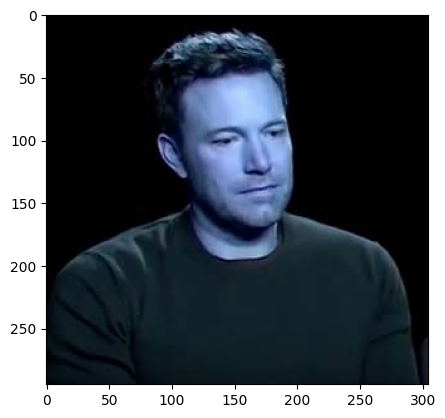

In [108]:
plt.imshow(test_img)

In [109]:
test_img.shape

(295, 305, 3)

In [110]:
test_img = cv2.resize(test_img,(256,256))

In [111]:
test_input = test_img.reshape((1,256,256,3))

In [112]:
predictions = model.predict(test_input)

1/1 [==============================] - 0s 87ms/step


In [113]:
emotion_labels = ['Angry', 'Happy', 'Fear', 'Disgust', 'Sad', 'Surprise', 'Neutral']
predicted_emotion_index = np.argmax(predictions[0])
predicted_emotion = emotion_labels[predicted_emotion_index]

print("Predicted emotion:", predicted_emotion)


Predicted emotion: Neutral


**Testing with a Surprise Image**

In [114]:
import matplotlib.pyplot as plt

In [115]:
test_img = cv2.imread('/content/surprise.jpg')

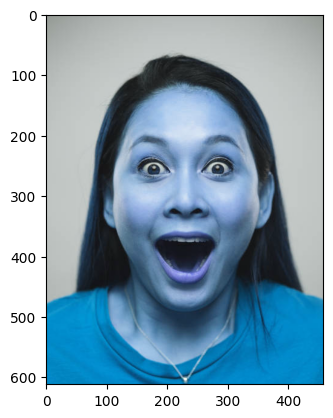

In [116]:
plt.imshow(test_img)

In [117]:
test_img.shape

(612, 459, 3)

In [118]:
test_img = cv2.resize(test_img,(256,256))

In [119]:
test_input = test_img.reshape((1,256,256,3))

In [120]:
predictions = model.predict(test_input)

1/1 [==============================] - 0s 57ms/step


In [121]:
emotion_labels = ['Angry', 'Happy', 'Fear', 'Disgust', 'Sad', 'Surprise', 'Neutral']
predicted_emotion_index = np.argmax(predictions[0])
predicted_emotion = emotion_labels[predicted_emotion_index]

print("Predicted emotion:", predicted_emotion)


Predicted emotion: Surprise


**Testing with a Anger Image**

In [122]:
test_img = cv2.imread('/content/angry.jpg')

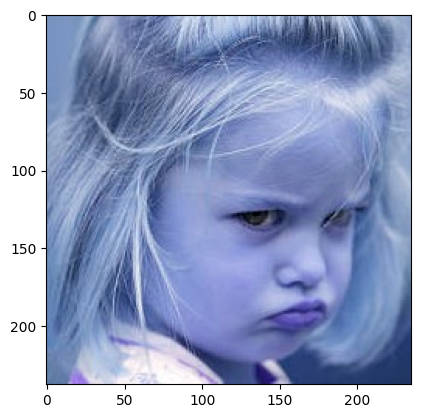

In [123]:
plt.imshow(test_img)

In [124]:
test_img.shape

(238, 235, 3)

In [125]:
test_img = cv2.resize(test_img,(256,256))

In [126]:
test_input = test_img.reshape((1,256,256,3))

In [127]:
predictions = model.predict(test_input)

1/1 [==============================] - 0s 55ms/step


In [128]:
emotion_labels = ['Angry', 'Happy', 'Fear', 'Disgust', 'Sad', 'Surprise', 'Neutral']
predicted_emotion_index = np.argmax(predictions[0])
predicted_emotion = emotion_labels[predicted_emotion_index]

print("Predicted emotion:", predicted_emotion)


Predicted emotion: Angry
